In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('company_sales_data.csv')
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


In [31]:
y = df['total_profit']
x = df.drop(columns='total_profit')

In [32]:
y,x

(0     211000
 1     183300
 2     224700
 3     222700
 4     209600
 5     201400
 6     295500
 7     361400
 8     234000
 9     266700
 10    412800
 11    300200
 Name: total_profit, dtype: int64,
     month_number  facecream  facewash  toothpaste  bathingsoap  shampoo  \
 0              1       2500      1500        5200         9200     1200   
 1              2       2630      1200        5100         6100     2100   
 2              3       2140      1340        4550         9550     3550   
 3              4       3400      1130        5870         8870     1870   
 4              5       3600      1740        4560         7760     1560   
 5              6       2760      1555        4890         7490     1890   
 6              7       2980      1120        4780         8980     1780   
 7              8       3700      1400        5860         9960     2860   
 8              9       3540      1780        6100         8100     2100   
 9             10       1990      189

In [33]:
x_b = np.c_[np.ones(x.shape[0]),x]
x_b

array([[1.000e+00, 1.000e+00, 2.500e+03, 1.500e+03, 5.200e+03, 9.200e+03,
        1.200e+03, 1.500e+03, 2.110e+04],
       [1.000e+00, 2.000e+00, 2.630e+03, 1.200e+03, 5.100e+03, 6.100e+03,
        2.100e+03, 1.200e+03, 1.833e+04],
       [1.000e+00, 3.000e+00, 2.140e+03, 1.340e+03, 4.550e+03, 9.550e+03,
        3.550e+03, 1.340e+03, 2.247e+04],
       [1.000e+00, 4.000e+00, 3.400e+03, 1.130e+03, 5.870e+03, 8.870e+03,
        1.870e+03, 1.130e+03, 2.227e+04],
       [1.000e+00, 5.000e+00, 3.600e+03, 1.740e+03, 4.560e+03, 7.760e+03,
        1.560e+03, 1.740e+03, 2.096e+04],
       [1.000e+00, 6.000e+00, 2.760e+03, 1.555e+03, 4.890e+03, 7.490e+03,
        1.890e+03, 1.555e+03, 2.014e+04],
       [1.000e+00, 7.000e+00, 2.980e+03, 1.120e+03, 4.780e+03, 8.980e+03,
        1.780e+03, 1.120e+03, 2.955e+04],
       [1.000e+00, 8.000e+00, 3.700e+03, 1.400e+03, 5.860e+03, 9.960e+03,
        2.860e+03, 1.400e+03, 3.614e+04],
       [1.000e+00, 9.000e+00, 3.540e+03, 1.780e+03, 6.100e+03, 8.100e+03

In [34]:
coeff = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y
coeff

array([ 5.95601293e+19, -3.92493449e+18, -6.94252812e+15, -2.27084720e+17,
       -1.05741818e+03, -3.59431276e+02, -5.01072451e+02,  2.24036115e+17,
        3.59247932e+01])

In [35]:
y_pred = x_b @ coeff
y_pred

array([ 3.37059674e+19,  2.97930857e+19,  2.88431853e+19,  1.68108724e+19,
        9.63778343e+18,  1.21085644e+19,  7.98241681e+18, -1.79474724e+18,
       -5.76734701e+18,  7.33290571e+17, -6.26173574e+18, -1.30379604e+19])

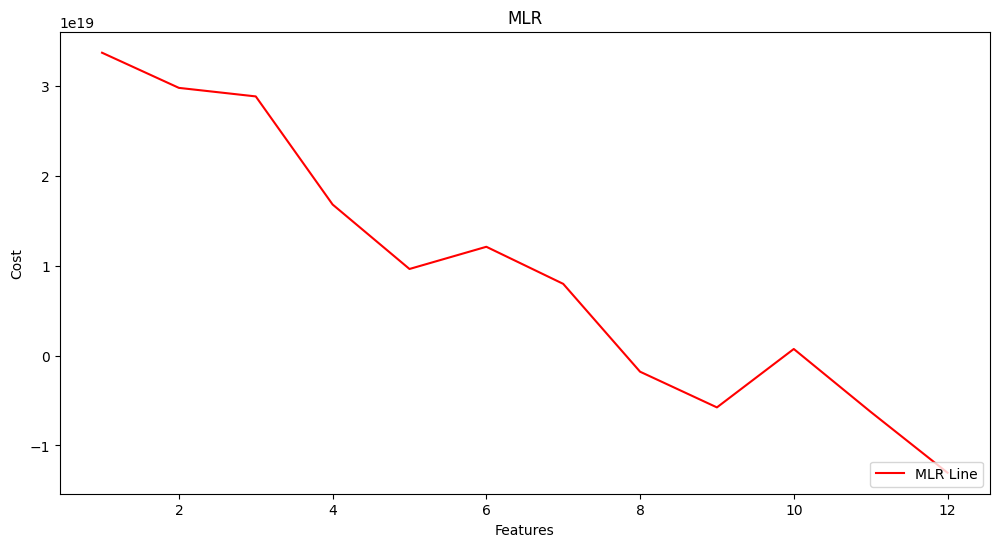

In [41]:

plt.figure(figsize=(12,6))
plt.xlabel("Features")
plt.ylabel("Cost")
plt.title("MLR")
# plt.scatter(x,y,label='data points')
plt.plot(x_b[:,1],y_pred,label='MLR Line', color = 'red')
plt.legend(loc=4)
plt.show()